# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Loading the DataFrame

In [2]:
data = pd.read_csv('https://github.com/sukhioo7/dataset/blob/main/insurance.csv?raw=True')

**Checking the first five records of our data**

In [3]:
data.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Encoding Columns

## Apply Label Encoder on gender and smoker column

In [4]:
from sklearn.preprocessing import LabelEncoder

label_gender = LabelEncoder()

In [5]:
label_gender.fit(data['gender'])

LabelEncoder()

In [6]:
data['gender'] = label_gender.transform(data['gender'])

In [7]:
label_smoker = LabelEncoder()

In [8]:
label_smoker.fit(data['smoker'])

LabelEncoder()

In [9]:
data['smoker'] = label_smoker.transform(data['smoker'])

## Applying One Hot Encoding on region column

In [10]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()

In [11]:
one_hot.fit(data[['region']])

OneHotEncoder()

In [12]:
arr = one_hot.transform(data[['region']]).toarray()

In [13]:
arr

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [14]:
one_hot.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

## Making the temp data frame with encoded data to concat

In [15]:
region = pd.DataFrame(arr,columns=['northeast', 'northwest', 'southeast', 'southwest'],dtype='int')
region.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [16]:
data = pd.concat([data,region],axis=1)

## Droping the old region column

In [17]:
data.drop('region',axis=1,inplace=True)

In [18]:
data.head()

,age,gender,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


## Splitting the data into training and testing

In [19]:
X = data.drop('charges',axis=1)
Y = data['charges']

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

# Making ANN model

In [30]:
# Ann model is created using TensorFlow sequential API. It consists of an imput
# layers with 9 neurons (corresponding to the features), two hidden layers with 14 neurons
# each , and an output layer with 1 neurons(for predicting insurances charges).
# The activation function used in the hidden layers in ReLU(rectified Linear Unit),
# and the output layers uses a linear function

model = tf.keras.models.Sequential()

# Input Layer with 9 number of nurons
model.add(tf.keras.layers.Input(shape=9))

# Hidden Layers
model.add(tf.keras.layers.Dense(units=14,activation='relu'))
model.add(tf.keras.layers.Dense(units=14,activation='relu'))

# Output Layer
model.add(tf.keras.layers.Dense(units=1,activation='linear'))

# Compiling our model
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])


In [22]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=40)


Epoch 1/40
34/34 [==============================] - 2s 11ms/step - loss: 326361888.0000 - accuracy: 0.0000e+00 - val_loss: 304915776.0000 - val_accuracy: 0.0000e+00
Epoch 2/40
34/34 [==============================] - 0s 4ms/step - loss: 326033536.0000 - accuracy: 0.0000e+00 - val_loss: 304532960.0000 - val_accuracy: 0.0000e+00
Epoch 3/40
34/34 [==============================] - 0s 6ms/step - loss: 325527008.0000 - accuracy: 0.0000e+00 - val_loss: 303918208.0000 - val_accuracy: 0.0000e+00
Epoch 4/40
34/34 [==============================] - 0s 4ms/step - loss: 324724640.0000 - accuracy: 0.0000e+00 - val_loss: 302900352.0000 - val_accuracy: 0.0000e+00
Epoch 5/40
34/34 [==============================] - 0s 5ms/step - loss: 323213472.0000 - accuracy: 0.0000e+00 - val_loss: 300929440.0000 - val_accuracy: 0.0000e+00
Epoch 6/40
34/34 [==============================] - 0s 4ms/step - loss: 320765472.0000 - accuracy: 0.0000e+00 - val_loss: 298074240.0000 - val_accuracy: 0.0000e+00
Epoch 7/40
34/3

Epoch 1/40
34/34 [==============================] - 0s 6ms/step - loss: 130421200.0000 - accuracy: 0.0000e+00 - val_loss: 122377168.0000 - val_accuracy: 0.0000e+00
Epoch 2/40
34/34 [==============================] - 0s 8ms/step - loss: 130375112.0000 - accuracy: 0.0000e+00 - val_loss: 122357656.0000 - val_accuracy: 0.0000e+00
Epoch 3/40
34/34 [==============================] - 0s 8ms/step - loss: 130301784.0000 - accuracy: 0.0000e+00 - val_loss: 122240768.0000 - val_accuracy: 0.0000e+00
Epoch 4/40
34/34 [==============================] - 0s 8ms/step - loss: 130274112.0000 - accuracy: 0.0000e+00 - val_loss: 122213864.0000 - val_accuracy: 0.0000e+00
Epoch 5/40
34/34 [==============================] - 0s 8ms/step - loss: 130283976.0000 - accuracy: 0.0000e+00 - val_loss: 122185000.0000 - val_accuracy: 0.0000e+00
Epoch 6/40
34/34 [==============================] - 0s 7ms/step - loss: 130206208.0000 - accuracy: 0.0000e+00 - val_loss: 122181136.0000 - val_accuracy: 0.0000e+00
Epoch 7/40
34/34

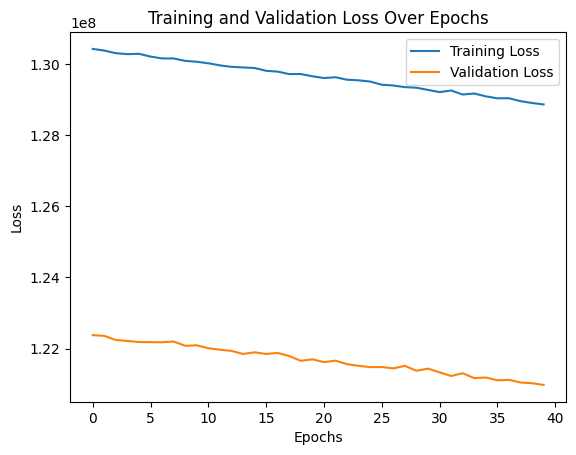

In [23]:
# Training the Model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=40)

# Save the trained model
model.save("insurance_ann_model")

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()


In [27]:
import tensorflow as tf

# Load the saved model
loaded_model = tf.keras.models.load_model("insurance_ann_model")

# Create a new entry with values for features
new_entry = pd.DataFrame({
    'age': [18],
    'sex': ['male'],
    'bmi': [25.5],
    'children': [4],
    'smoker': ['yes'],
    'region': ['southwest']
})

# Encode categorical variables in the new entry
new_entry['gender'] = label_gender.transform(new_entry['sex'])
new_entry['smoker'] = label_smoker.transform(new_entry['smoker'])
new_entry_region = pd.DataFrame(one_hot.transform(new_entry[['region']]).toarray(), columns=['northeast', 'northwest', 'southeast', 'southwest'])
new_entry = pd.concat([new_entry, new_entry_region], axis=1)
new_entry.drop(['sex', 'region'], axis=1, inplace=True)

# Check the new entry
print("New Entry:")
print(new_entry)

# Predict insurance charges for the new entry using the loaded model
predicted_charges = loaded_model.predict(new_entry)

print("\nPredicted Insurance Charges:", predicted_charges)


New Entry:
   age   bmi  children  smoker  gender  northeast  northwest  southeast  \
0   18  25.5         4       1       1        0.0        0.0        0.0   

   southwest  
0        1.0  
1/1 [==============================] - 0s 111ms/step

Predicted Insurance Charges: [[10303.818]]


In [28]:
# Evaluate the model on the testing data



9/9 [==============================] - 1s 5ms/step - loss: 120978680.0000 - accuracy: 0.0000e+00
Accuracy: 0.0
Loss: 120978680.0
